In [132]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import librosa 
import librosa.display
from IPython.display import Audio
from pydub import AudioSegment, effects

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras import layers, optimizers, callbacks

plt.style.use('ggplot')

In [24]:
RAVDESS = "audio_speech_actors_01-24"
CREMA = "AudioWAV"
TESS = "TESS Toronto emotional speech set data"
SAVEE = "ALL"

##### Ravdess Dataframe

In [50]:
ravdess_dir_lis = os.listdir(RAVDESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    '03': 'happy',
    '01': 'neutral',
    '04': 'sad',
    '05': 'angry',
    '06': 'fear',
    '07': 'disgust',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(RAVDESS, directory))
    for audio_file in actor_files: 
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            gender_code = int(part.split('-')[6])
            # Ensure paths have the correct separators
            path_list.append(os.path.join(RAVDESS, directory, audio_file))
            gender_list.append('female' if gender_code % 2 == 0 else 'male')
            emotion_list.append(emotion_dic[key])

ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

ravdess_df.head()


,path,sex,emotion
0,audio_speech_actors_01-24\Actor_01\03-01-01-01...,male,neutral
1,audio_speech_actors_01-24\Actor_01\03-01-01-01...,male,neutral
2,audio_speech_actors_01-24\Actor_01\03-01-01-01...,male,neutral
3,audio_speech_actors_01-24\Actor_01\03-01-01-01...,male,neutral
4,audio_speech_actors_01-24\Actor_01\03-01-03-01...,male,happy


##### Crema-D Dataframe

In [52]:
crema_dir_list = os.listdir(CREMA)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'HAP': 'happy',
    'NEU': 'neutral',
    'SAD': 'sad',
    'ANG': 'angry',
    'FEA': 'fear',
    'DIS': 'disgust',
}

female_id_list = [
    '1002', '1003', '1004', '1006', '1007', '1008', '1009', '1010', '1012', '1013', '1018', 
    '1020', '1021', '1024', '1025', '1028', '1029', '1030', '1037', '1043', '1046', '1047', 
    '1049', '1052', '1053', '1054', '1055', '1056', '1058', '1060', '1061', '1063', '1072', 
    '1073', '1074', '1075', '1076', '1078', '1079', '1082', '1084', '1089', '1091',
]

for audio_file in crema_dir_list:
    part = audio_file.split('_')
    key = part[2]
    if key in emotion_dic and part[3] == 'HI.wav':
        # Use os.path.join() for consistent path formatting
        path_list.append(os.path.join(CREMA, audio_file))
        gender_list.append('female' if part[0] in female_id_list else 'male')
        emotion_list.append(emotion_dic[key])

crema_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

crema_df.head()


,path,sex,emotion
0,AudioWAV\1001_IEO_ANG_HI.wav,male,angry
1,AudioWAV\1001_IEO_DIS_HI.wav,male,disgust
2,AudioWAV\1001_IEO_FEA_HI.wav,male,fear
3,AudioWAV\1001_IEO_HAP_HI.wav,male,happy
4,AudioWAV\1001_IEO_SAD_HI.wav,male,sad


####  Tess Dataframe

In [54]:
tess_dir_list = os.listdir(TESS)
path_list = []
gender_list = []
emotion_list = [] 

emotion_dic = {
    'happy': 'happy',
    'neutral': 'neutral',
    'sad': 'sad',
    'Sad': 'sad',
    'angry': 'angry',
    'fear': 'fear',
    'disgust': 'disgust',
}

for directory in tess_dir_list:
    audio_files = os.listdir(os.path.join(TESS, directory))
    for audio_file in audio_files:
        part = audio_file.split('.')[0]
        key = part.split('_')[2]
        if key in emotion_dic:
            # Use os.path.join() for consistent path formatting
            path_list.append(os.path.join(TESS, directory, audio_file))
            gender_list.append('female')  # Female-only dataset
            emotion_list.append(emotion_dic[key])

tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

tess_df.head()


,path,sex,emotion
0,TESS Toronto emotional speech set data\OAF_ang...,female,angry
1,TESS Toronto emotional speech set data\OAF_ang...,female,angry
2,TESS Toronto emotional speech set data\OAF_ang...,female,angry
3,TESS Toronto emotional speech set data\OAF_ang...,female,angry
4,TESS Toronto emotional speech set data\OAF_ang...,female,angry


#### Savee Dataframe

In [56]:
savee_dir_list = os.listdir(SAVEE)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'h': 'happy',
    'n': 'neutral',
    'sa': 'sad',
    'a': 'angry',
    'f': 'fear',
    'd': 'disgust'
}

for audio_file in savee_dir_list:
    part = audio_file.split('_')[1]
    key = part[:-6]
    if key in emotion_dic:
        # Use os.path.join() for consistent path formatting
        path_list.append(os.path.join(SAVEE, audio_file))
        gender_list.append('male')  # Male-only dataset
        emotion_list.append(emotion_dic[key])

savee_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

savee_df.head()


,path,sex,emotion
0,ALL\DC_a01.wav,male,angry
1,ALL\DC_a02.wav,male,angry
2,ALL\DC_a03.wav,male,angry
3,ALL\DC_a04.wav,male,angry
4,ALL\DC_a05.wav,male,angry


In [58]:
df = pd.concat([
    ravdess_df, 
    crema_df, 
    tess_df, 
    savee_df
], axis=0)
df.head()

,path,sex,emotion
0,audio_speech_actors_01-24\Actor_01\03-01-01-01...,male,neutral
1,audio_speech_actors_01-24\Actor_01\03-01-01-01...,male,neutral
2,audio_speech_actors_01-24\Actor_01\03-01-01-01...,male,neutral
3,audio_speech_actors_01-24\Actor_01\03-01-01-01...,male,neutral
4,audio_speech_actors_01-24\Actor_01\03-01-03-01...,male,happy


In [169]:
df.to_csv('DATA.csv', index=False)

#### Quick EDA¶
We check for imbalances like male to female ratio.

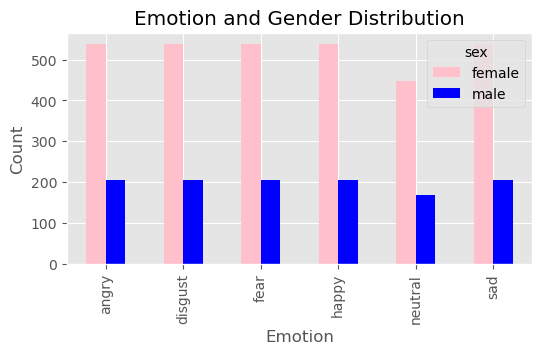

In [61]:
def plot_distribution(df): 
    countTable = df.groupby(['emotion', 'sex']).count()
    pivotTable = countTable.pivot_table(index='emotion', columns='sex', values='path')

    pivotTable.plot(kind='bar', figsize=(6, 3), color=['pink', 'blue'])
    plt.title('Emotion and Gender Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()
    
plot_distribution(df)

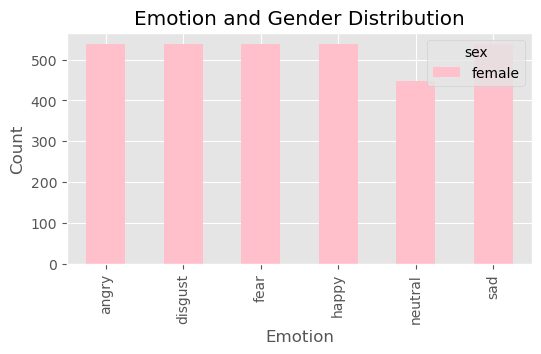

In [63]:
# I decided to go with a female specific model 
df = df[df['sex'] == 'female']
plot_distribution(df)

In [65]:
df.drop('sex', axis=1, inplace=True)
df.head()

,path,emotion
44,audio_speech_actors_01-24\Actor_02\03-01-01-01...,neutral
45,audio_speech_actors_01-24\Actor_02\03-01-01-01...,neutral
46,audio_speech_actors_01-24\Actor_02\03-01-01-01...,neutral
47,audio_speech_actors_01-24\Actor_02\03-01-01-01...,neutral
48,audio_speech_actors_01-24\Actor_02\03-01-03-01...,happy


In [143]:
df['path'][3]

'TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav'

In [67]:
def create_waveplot(y, sr, title):
    plt.figure(figsize=(8, 2))
    plt.title(title)
    librosa.display.waveshow(y, sr=sr)
    plt.show()

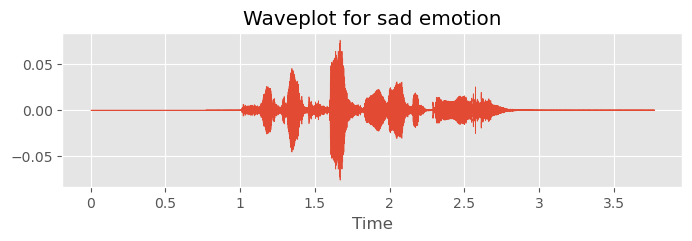

In [69]:
emotion_label = 'sad'
title = f"Waveplot for {emotion_label} emotion"
path = np.array(df.path[df.emotion == emotion_label])[1]
y, sr = librosa.load(path)

create_waveplot(y, sr, title)
Audio(path)

#### Preprocess
The following steps will be followed to preprocess the audio:

Get an array of samples
Trim the silence
Padding for equal length

In [78]:
def preprocess_audio(path):
    _, sr = librosa.load(path)
    raw_audio = AudioSegment.from_file(path)
    
    samples = np.array(raw_audio.get_array_of_samples(), dtype='float32')
    trimmed, _ = librosa.effects.trim(samples, top_db=25)
    padded = np.pad(trimmed, (0, 180000-len(trimmed)), 'constant')
    return padded, sr

In [80]:
emotion_dic = {
    'neutral' : 0,
    'happy'   : 1,
    'sad'     : 2, 
    'angry'   : 3, 
    'fear'    : 4, 
    'disgust' : 5
}

def encode(label):
    return emotion_dic.get(label)

#### Extract features
We will only extract these features:

Mel-Frequency Cepstral Coefficients: captures the shape of the spectral envelope of a signal
Zero Crossing Rate: captures the number of times a signal changes sign per second
Root Mean Square Energy: captures the root mean square amplitude of the audio signal

In [83]:
zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

for row in df.itertuples(index=False):
    try: 
        y, sr = preprocess_audio(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))
    except:
        print(f"Failed for path: {row.path}")

Failed for path: audio_speech_actors_01-24\Actor_20\03-01-06-01-01-02-20.wav


C:\Users\ssttg\anaconda3\Lib\site-packages\pydub\utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


Failed for path: TESS Toronto emotional speech set data\YAF_angry\YAF_germ_angry.wav
Failed for path: TESS Toronto emotional speech set data\YAF_fear\YAF_neat_fear.wav


In [84]:
X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2), 
    np.swapaxes(rms_list, 1, 2), 
    np.swapaxes(mfccs_list, 1, 2)), 
    axis=2
)
X = X.astype('float32')

y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')

#### Build a LSTM
Before building the model, we will have to setup the data. LSTM are great for sequences.

In [87]:
X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.12, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)

y_train_class = to_categorical(y_train, 6)
y_val_class = to_categorical(y_val, 6)

In [94]:
MODEL = Sequential()
MODEL.add(layers.LSTM(64, return_sequences=True, input_shape=(X.shape[1:3])))
MODEL.add(layers.LSTM(64))
MODEL.add(layers.Dense(6, activation='softmax'))

print(MODEL.summary())

C:\Users\ssttg\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 352, 64)        │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,894 (210.52 KB)

 Trainable params: 53,894 (210.52 KB)

 Non-trainable params: 0 (0.00 B)

None


In [96]:
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.01, patience=100)
MODEL.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['categorical_accuracy'])
model = MODEL.fit(X_train, y_train_class, epochs=200, batch_size=6, validation_data=(X_val, y_val_class))

Epoch 1/200
461/461 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - categorical_accuracy: 0.2941 - loss: 1.6201 - val_categorical_accuracy: 0.4715 - val_loss: 1.3939
Epoch 2/200
461/461 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - categorical_accuracy: 0.4991 - loss: 1.2719 - val_categorical_accuracy: 0.5894 - val_loss: 1.0980
Epoch 3/200
461/461 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - categorical_accuracy: 0.5423 - loss: 1.1685 - val_categorical_accuracy: 0.5589 - val_loss: 1.1610
Epoch 4/200
461/461 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - categorical_accuracy: 0.5713 - loss: 1.1204 - val_categorical_accuracy: 0.5703 - val_loss: 1.2076
Epoch 5/200
461/461 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - categorical_accuracy: 0.6047 - loss: 1.0431 - val_categorical_accuracy: 0.7072 - val_loss: 0.9253
Epoch 6/200
461/461 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - categorical_accuracy: 0.6285 - loss: 0.9656 - val_categorical_accuracy: 0.6350 - val_loss: 0.9620
Epoch 7/200
461/461 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - categorical_a

Validation Loss:  0.38272780179977417
Validation Accuracy:  88.21292519569397 %


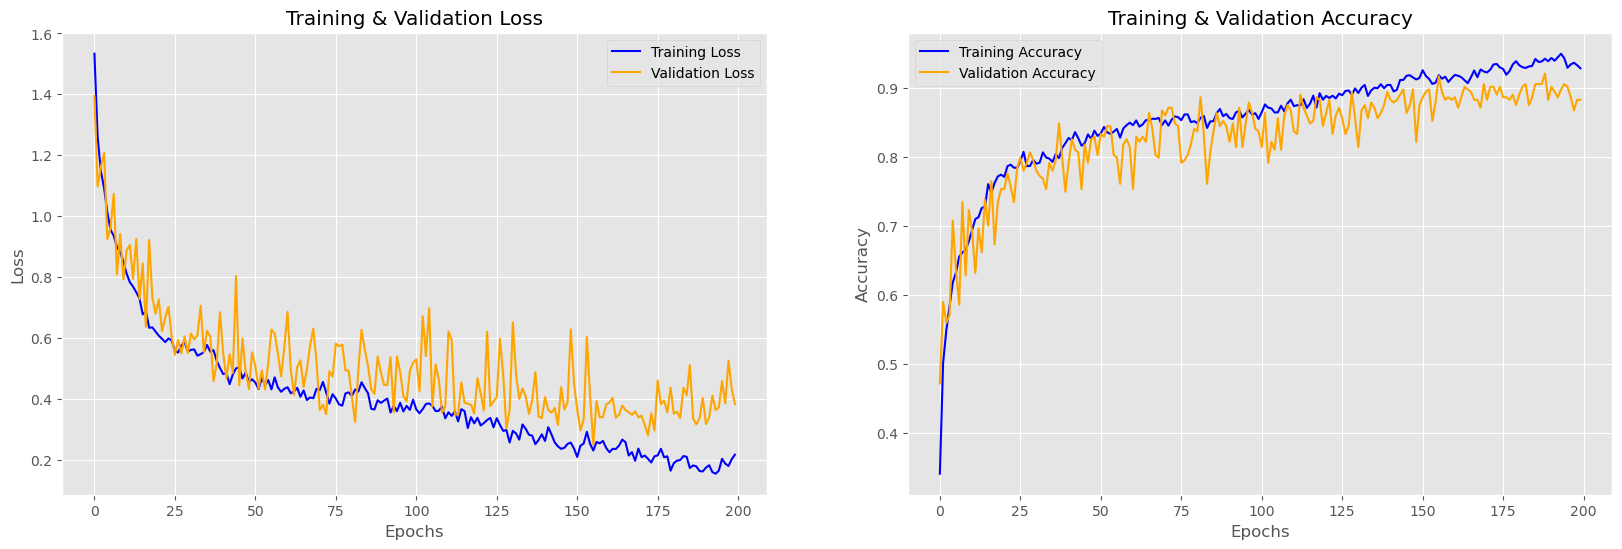

In [118]:
# Evaluate the model on the validation data
test_loss, test_accuracy = MODEL.evaluate(X_val, y_val_class, verbose=0)

# Print the evaluation results
print("Validation Loss: ", test_loss)
print("Validation Accuracy: ", test_accuracy * 100, "%")

# Extract training metrics from the fit history
epochs = range(len(model.history['loss']))  # Number of epochs
train_loss = model.history['loss']
val_loss = model.history['val_loss']
train_acc = model.history['categorical_accuracy']
val_acc = model.history['val_categorical_accuracy']

# Create subplots for loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plot training and validation loss
ax[0].plot(epochs, train_loss, label='Training Loss', color='blue')
ax[0].plot(epochs, val_loss, label='Validation Loss', color='orange')
ax[0].set_title('Training & Validation Loss')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

# Plot training and validation accuracy
ax[1].plot(epochs, train_acc, label='Training Accuracy', color='blue')
ax[1].plot(epochs, val_acc, label='Validation Accuracy', color='orange')
ax[1].set_title('Training & Validation Accuracy')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

# Show the plots
plt.show()


In [134]:
# Step 1: Make predictions
y_pred_prob = MODEL.predict(X_val)  # Get the probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Step 2: Convert true labels back from one-hot encoding to class labels
y_true = np.argmax(y_val_class, axis=1)  # Convert one-hot to class labels

# Step 3: Generate the classification report
report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

# Step 4: Display the report
print(report)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
              precision    recall  f1-score   support

     Class 0       0.91      0.97      0.94        33
     Class 1       0.96      0.88      0.92        51
     Class 2       0.73      0.84      0.78        38
     Class 3       0.95      0.90      0.93        42
     Class 4       0.86      0.92      0.89        53
     Class 5       0.90      0.78      0.84        46

    accuracy                           0.88       263
   macro avg       0.88      0.88      0.88       263
weighted avg       0.89      0.88      0.88       263



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


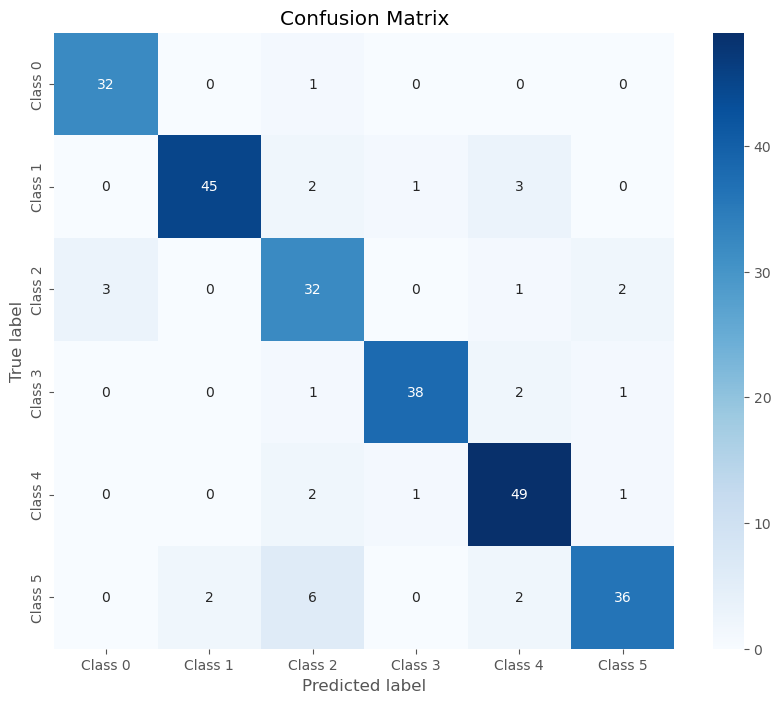

In [126]:
# Step 1: Make predictions
y_pred_prob = MODEL.predict(X_val)  # Get the probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Step 2: If your test labels are one-hot encoded, convert them back to class labels
y_true = np.argmax(y_val_class, axis=1)  # Convert one-hot to class labels

# Step 3: Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 4: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [120]:
MODEL.save('my_lstm_model_88.h5')

# Let's Predict

In [7]:
# Function to preprocess the audio
def preprocess_audio(path):
    raw_audio = AudioSegment.from_file(path)
    samples = np.array(raw_audio.get_array_of_samples(), dtype='float32')
    
    # Trim silence from the beginning and end
    trimmed, _ = librosa.effects.trim(samples, top_db=25)

    # Pad to a fixed length if necessary
    padded = np.pad(trimmed, (0, max(0, 180000 - len(trimmed))), 'constant')
    sr = raw_audio.frame_rate  # Get sample rate

    return padded, sr


In [9]:
# Function to make a prediction
def predict_audio(model, audio_path):
    # Preprocess the audio file
    processed_audio, sr = preprocess_audio(audio_path)

    # Extract features similar to training
    zcr = librosa.feature.zero_crossing_rate(processed_audio)
    rms = librosa.feature.rms(y=processed_audio)
    mfccs = librosa.feature.mfcc(y=processed_audio, sr=sr, n_mfcc=13)

    # Concatenate features to create the input array
    features = np.concatenate((
        np.swapaxes(zcr, 0, 1), 
        np.swapaxes(rms, 0, 1), 
        np.swapaxes(mfccs, 0, 1)), 
        axis=1
    )

    # Reshape for LSTM input (1 sample, timesteps, features)
    features = features.reshape(1, features.shape[0], features.shape[1])  # Add batch dimension

    # Make predictions
    predictions = model.predict(features)

    # Get the predicted class
    predicted_class = np.argmax(predictions, axis=1)

    return predicted_class


In [11]:
# Example usage
audio_file_path = 'TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav'  # Replace with your audio file path
predicted_emotion = predict_audio(MODEL, audio_file_path)

# Assuming you have a mapping of class indices to emotion labels
emotion_labels = ["Happiness", "Neutral", "Sadness", "Anger", "Fear", "Disgust"]

predicted_emotion_label = emotion_labels[predicted_emotion[0]]

print("Predicted Emotion: ", predicted_emotion_label)

NameError: name 'MODEL' is not defined